<a href="https://colab.research.google.com/github/amralfa/UT/blob/main/INN_Learner_Notebook_Full_code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# uncomment and run the following lines in case Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Loading the dataset
ds = pd.read_csv("bank-1.csv")

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
# First 5 rows of the data
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* Observations: The dataset preview shows the first five rows of a bank customer churn dataset. It includes features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, and whether the customer Exited. Notably, several customers with high credit scores and significant estimated salaries still exited, suggesting other factors like tenure, number of products, or balance may influence churn.

In [ ]:
# Last 5 rows of the data
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Observations**: The last five rows of the dataset show that none of the customers exited, despite differences in credit scores, balances, and estimated salaries. Most customers are inactive members, yet they were retained, indicating that activity status alone may not drive churn. Additionally, the number of products and tenure varies, suggesting no strong pattern between these features and customer retention. This highlights the need for further analysis to identify key churn factors.

### shape of the dataset

In [ ]:
# Number of rows and columns in the training data
ds.shape

(10000, 14)

**Observations**The training dataset contains 10,000 rows and 14 columns, indicating 10,000 customer records with 14 features each.

### Data types of the dataset columns

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations**: The dataset has 10,000 entries and 14 columns, with no missing values. It includes a mix of numerical and categorical data: 9 integer columns, 2 float columns, and 3 object-type columns. The target variable is Exited, and the dataset is clean and ready for preprocessing.

### Statistical Summary

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Observations**: The dataset summary shows 10,000 records with consistent entries across all columns. The average customer is around 39 years old, with a mean credit score of 650 and a typical tenure of 5 years. While the average balance is about 76,000, many customers have a balance of zero. Most customers hold one or two products, about 71% have a credit card, and roughly half are active members. The churn rate (Exited) is around 20%, indicating a moderate level of customer attrition.


### Missing Values check

In [ ]:
# Checking for missing values in the data
ds.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Observations**: The dataset is complete with no missing values in any column. This allows for smooth preprocessing and model building without the need for handling null entries.

### Unique values for each of the column check

In [ ]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


**Observations**: he dataset has a mix of unique and repeated values. Columns like RowNumber and CustomerId are unique for each entry, while features such as Geography, Gender, HasCrCard, and IsActiveMember have low cardinality, making them suitable for encoding. EstimatedSalary, Balance, and Surname have high uniqueness, while the target variable Exited is binary.

In [ ]:
#RowNumber , CustomerId and Surname are unique and being dropped
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
existing_columns = ds.columns

# Drop only the columns that exist in the DataFrame
ds = ds.drop(columns=[col for col in columns_to_drop if col in existing_columns], axis=1)

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    # Check if the feature is numeric before calculating and plotting mean and median
    if pd.api.types.is_numeric_dtype(data[feature]):
        ax_hist2.axvline(
            data[feature].mean(), color="green", linestyle="--"
        )  # Add mean to the histogram
        ax_hist2.axvline(
            data[feature].median(), color="black", linestyle="-"
        )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

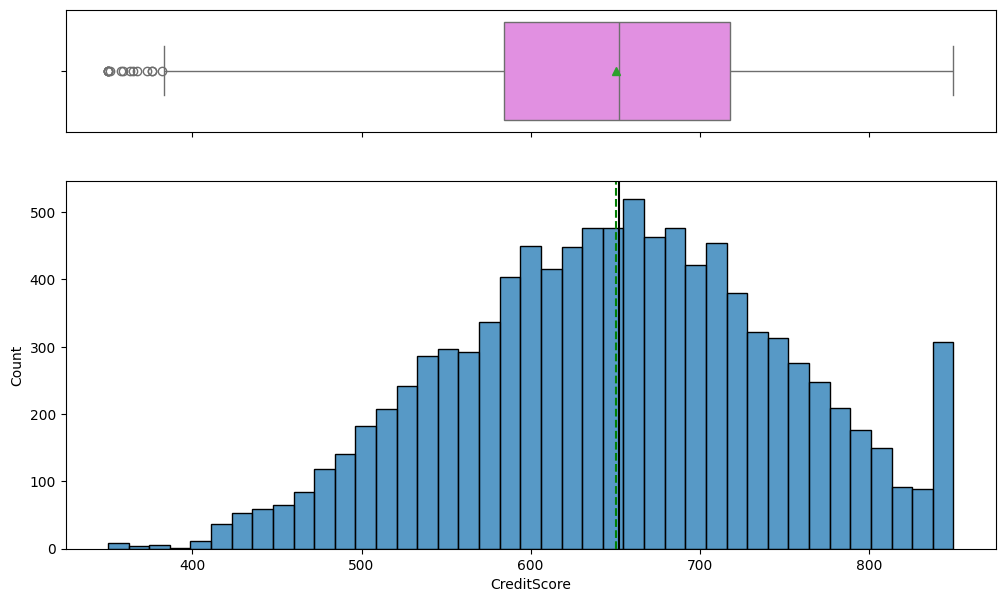

In [ ]:
histogram_boxplot(ds,'CreditScore')

**Observations**:
The visual shows the distribution of Credit Score using both a boxplot and a histogram:

The histogram indicates a roughly normal distribution centered around the mean (green dashed line), with a peak between 600 and 700.

The boxplot reveals a few outliers on the lower end (below ~400), but most values lie within a reasonable range.

Overall, the credit score data appears fairly symmetrical, with no extreme skewness.

#### Observations on Age

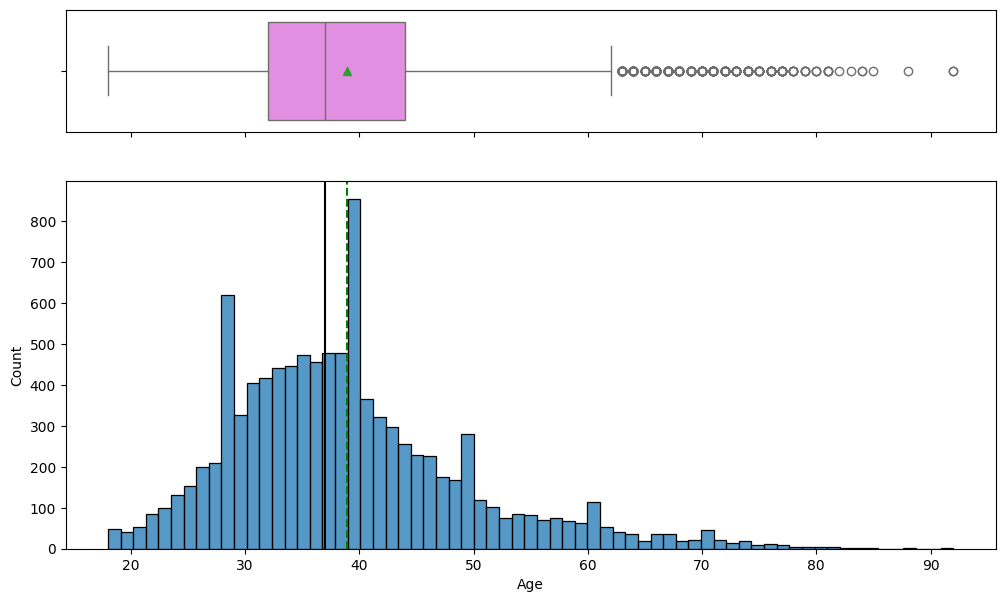

In [ ]:
histogram_boxplot(ds, 'Age')

**Observations**: The Age distribution is right-skewed, with most customers clustered between ages 25 and 45. The boxplot shows several outliers above 60, indicating a smaller group of older customers. The mean age (green dashed line) is around 39. Overall, the data is concentrated in the younger age range, with fewer older customers.

#### Observations on Balance


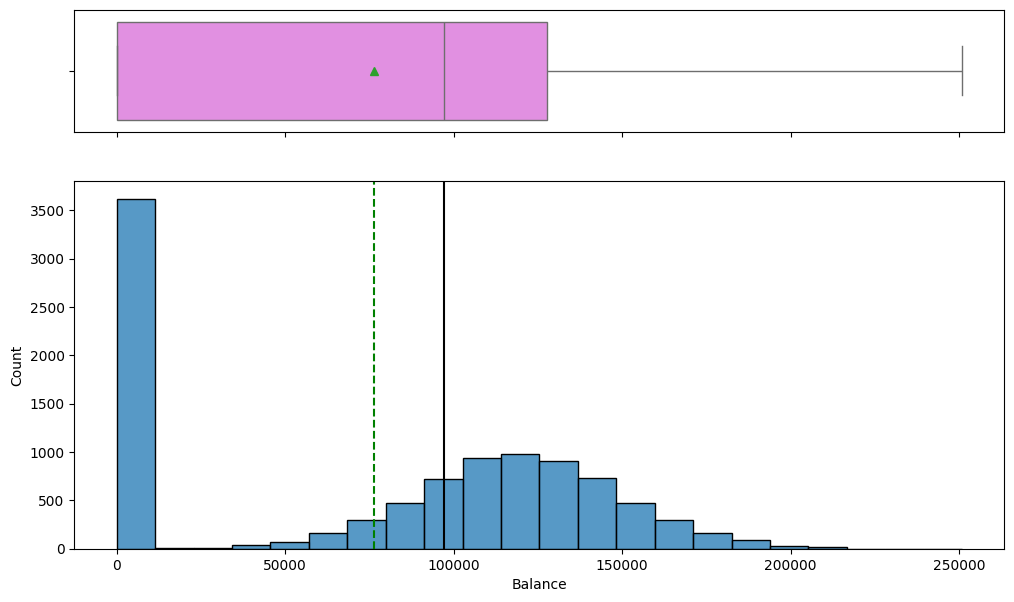

In [ ]:
histogram_boxplot(ds, 'Balance')

**Observations**: The Balance distribution is right-skewed with a large spike at zero, indicating many customers have no account balance. The rest of the values are spread fairly evenly up to 250,000. The boxplot shows no extreme outliers, and the mean balance (green dashed line) is around 76,000. This suggests a split between customers with zero balance and those holding substantial funds.

#### Observations on Estimated Salary

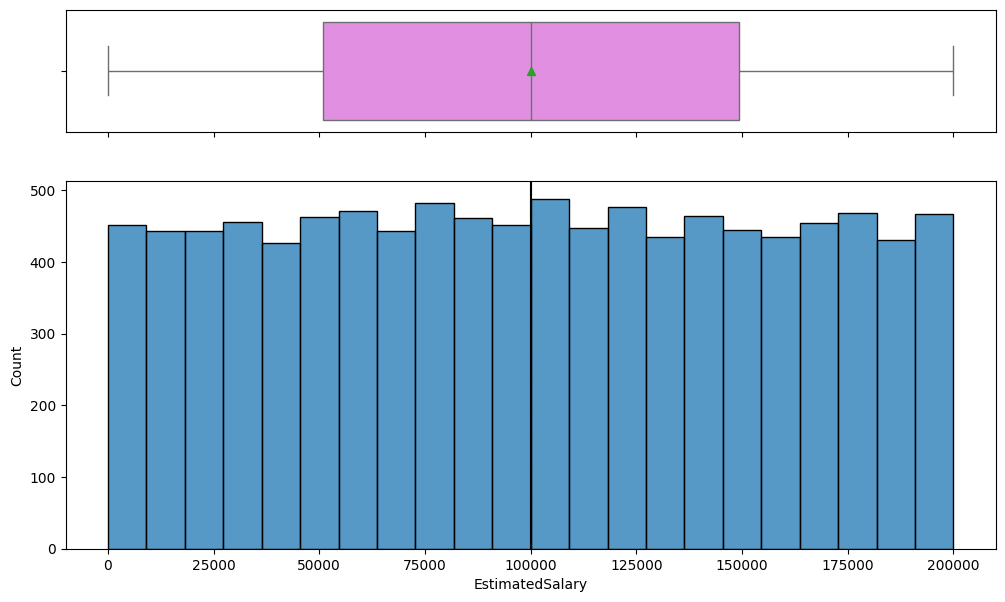

In [ ]:
histogram_boxplot(ds, 'EstimatedSalary')

**Observations**: The Estimated Salary distribution is uniformly spread, indicating salaries are evenly distributed across the range. The boxplot shows no outliers, and the mean salary is centered around 100,000. This suggests no bias or skew in income levels among customers in the dataset.

#### Observations on Exited

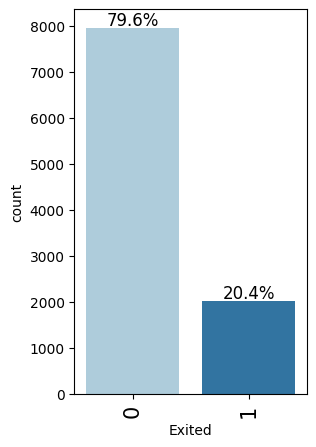

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

**Observations**: The bar chart shows that 79.6% of customers did not exit, while 20.4% did. This indicates an imbalanced dataset, where churned customers (class 1) are the minority, which may require special handling during model training (e.g., SMOTE or class weighting).

#### Observations on Geography

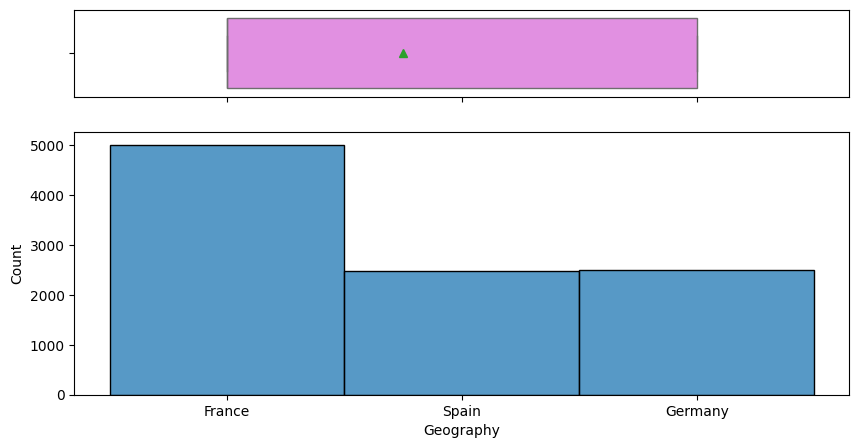

In [ ]:
histogram_boxplot(ds, 'Geography', figsize=(10, 5))

**Observations**: The Geography distribution shows that most customers are from France, followed by Spain and Germany, which have nearly equal representation. The boxplot confirms that all three categories are fairly distributed, though France dominates with over half of the entries. This may influence model outcomes if not properly encoded or balanced.

#### Observations on Gender

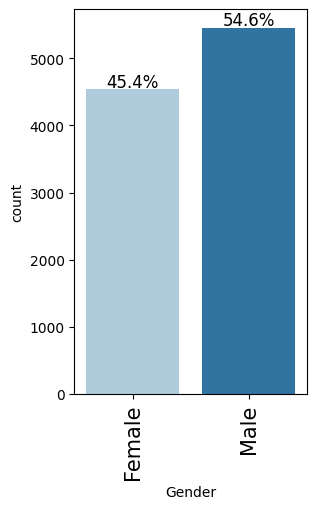

In [ ]:
labeled_barplot(ds, 'Gender', perc=True)

**Observations**: The Gender distribution is fairly balanced, with 54.6% male and 45.4% female customers. This slight male majority suggests minimal gender bias in the dataset, which is beneficial for building fair predictive models.

#### Observations on Tenure

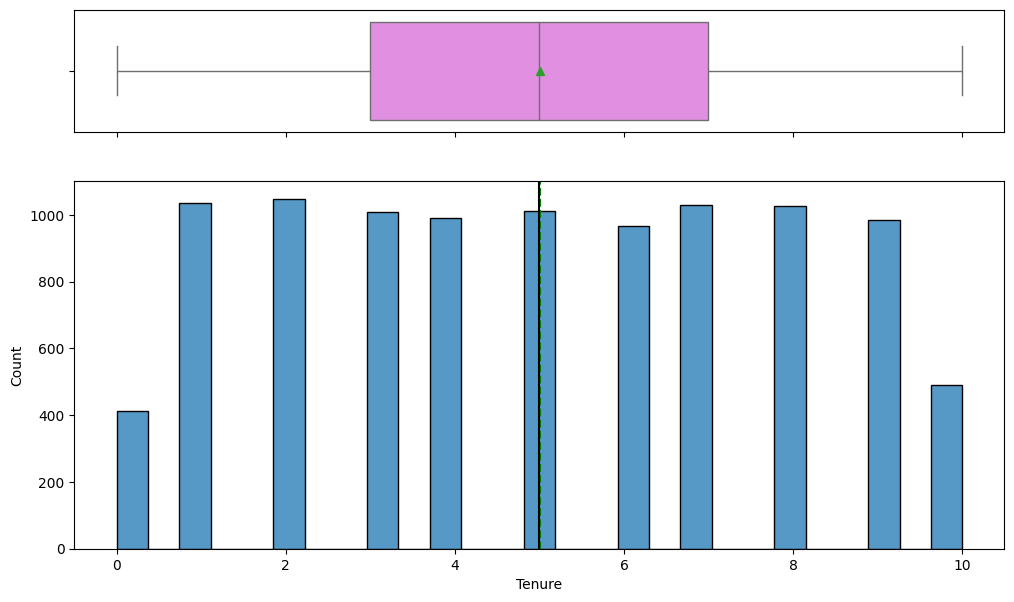

In [ ]:
histogram_boxplot(ds, 'Tenure')

**Observations**: The Tenure distribution is mostly uniform across values from 1 to 9 years, with fewer customers at 0 and 10 years. The mean tenure is around 5 years. The boxplot confirms no outliers, suggesting consistent customer engagement over time.

#### Observations on Number of Products

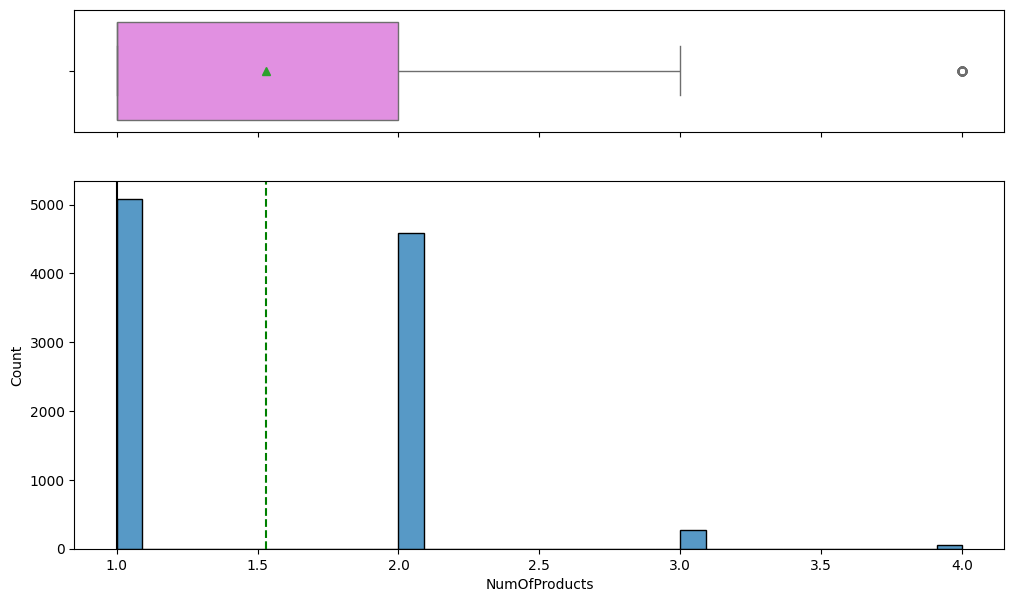

In [ ]:
histogram_boxplot(ds, 'NumOfProducts')

**Observations**: The NumOfProducts distribution shows that most customers have 1 or 2 products, with very few having 3 or 4. The boxplot confirms this, with 4 being a clear outlier. The mean lies between 1 and 2, indicating that most customers use only a limited number of products offered by the bank.

#### Observations on Has Credit Card

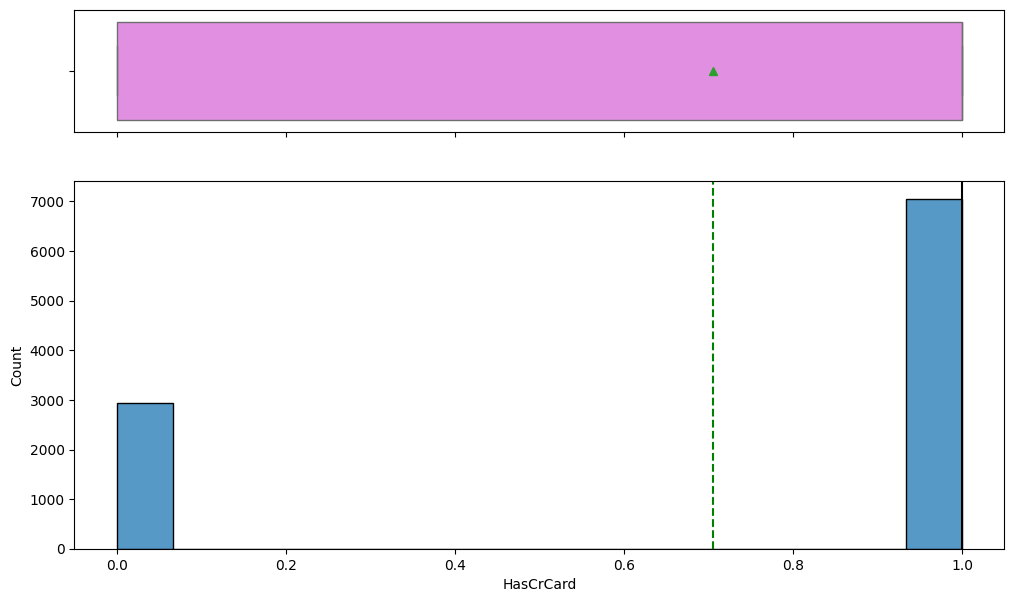

In [ ]:
histogram_boxplot(ds, 'HasCrCard')

**Observations**: The HasCrCard distribution shows that around 70% of customers have a credit card, while 30% do not. The boxplot confirms a binary distribution without outliers. This suggests credit card ownership is common but not universal among customers.

#### Observations on Is Active Member

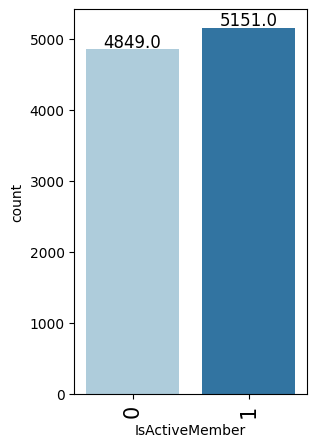

In [ ]:
labeled_barplot(ds, 'IsActiveMember')

**Observations**: The IsActiveMember distribution is nearly balanced, with 51.5% active and 48.5% inactive customers. This slight majority of active members suggests a relatively even split, which is useful for unbiased model training.


### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

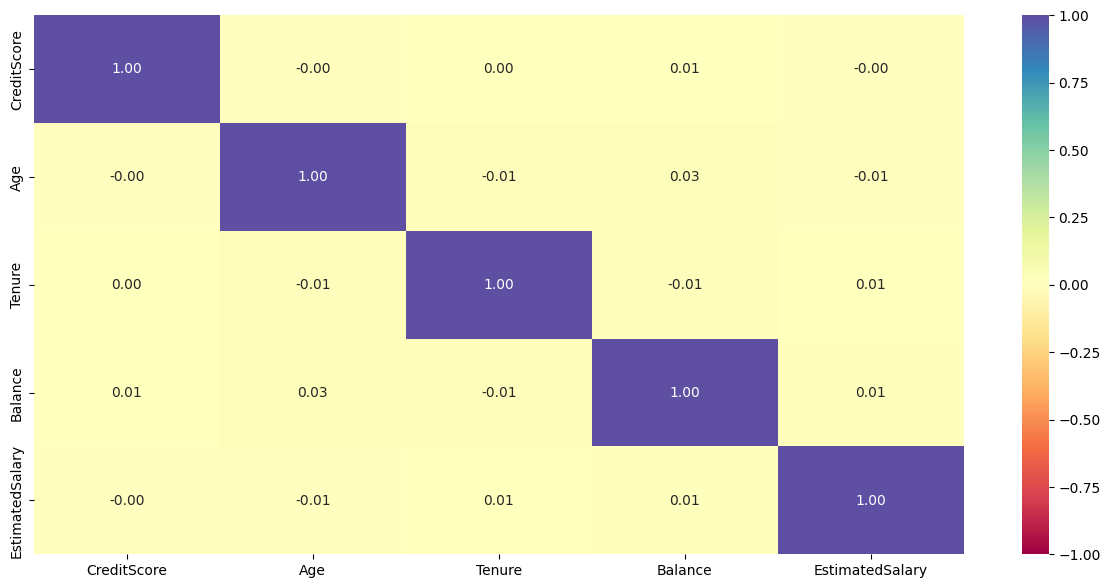

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**: The correlation heatmap shows that all numerical features in the dataset have very weak or no correlation with one another (correlation values near 0). This implies that each feature contributes unique information, and there's minimal multicollinearity among variables like CreditScore, Age, Tenure, Balance, and EstimatedSalary.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


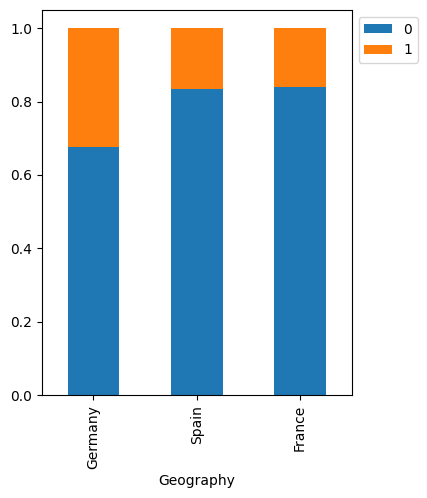

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

**Observations**: The stacked bar chart shows the churn rate (Exited) by Geography. Customers from Germany have the highest churn proportion, while Spain and France have lower and similar churn rates. This suggests that geography may be a significant factor influencing customer retention.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


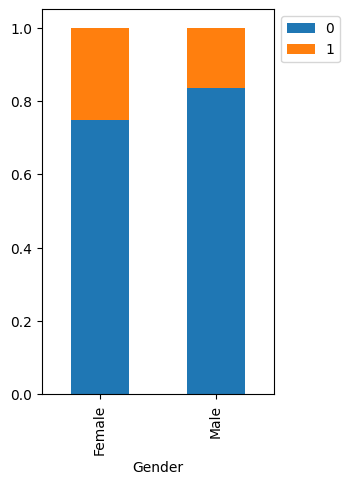

In [ ]:
stacked_barplot(ds, "Gender", "Exited")

#### Exited Vs Has Credit Card

**Observations**: The bar chart shows that female customers have a higher churn rate compared to males. While the majority of both genders did not exit, the proportion of churn is noticeably greater among females, suggesting gender may have an influence on customer attrition.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


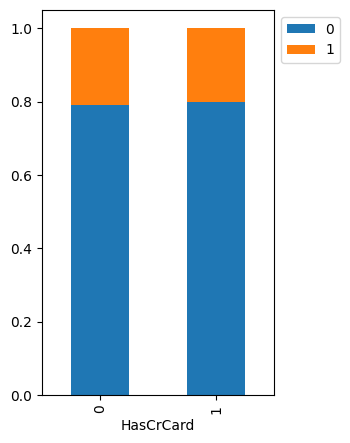

In [ ]:
stacked_barplot(ds, "HasCrCard", "Exited")

**Observations: The chart shows that churn rates are nearly identical for customers with and without a credit card. This suggests that credit card ownership does not significantly influence whether a customer exits the bank.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


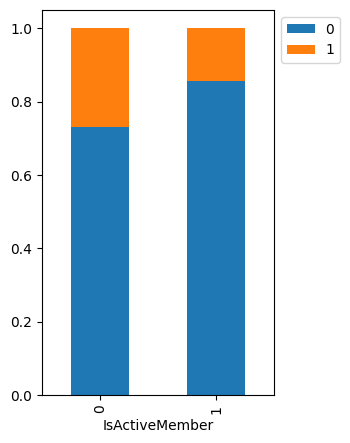

In [ ]:
stacked_barplot(ds, "IsActiveMember", "Exited")

**Observations**: The chart shows that inactive members (IsActiveMember = 0) have a higher churn rate compared to active members. This indicates that customer engagement is an important factor in retention—active members are more likely to stay with the bank.

#### Exited Vs Credit Score

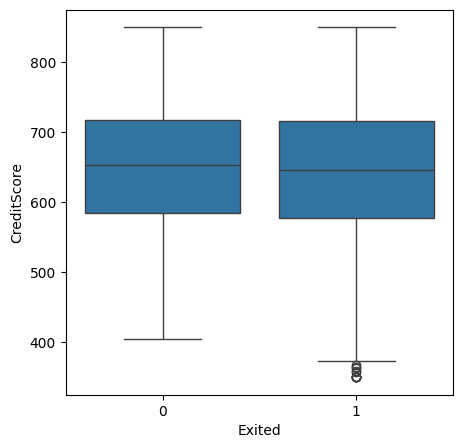

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

**Observations**: The boxplot shows that the CreditScore distributions for both churned (Exited = 1) and retained (Exited = 0) customers are quite similar. There is no significant difference in median or spread, indicating that CreditScore is not a strong predictor of churn in this dataset.

#### Exited Vs Age

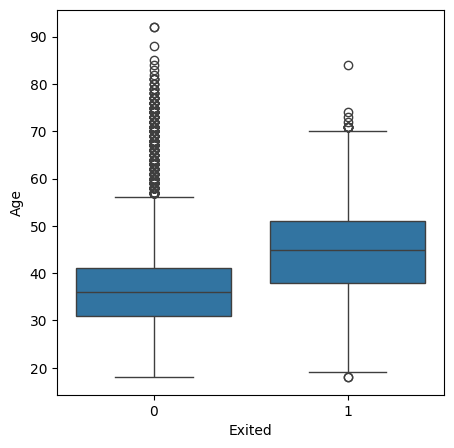

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

**Observations**: The boxplot indicates that churned customers (Exited = 1) are generally older than those who stayed. The median age is higher, and the distribution skews older. This suggests that age is a relevant factor in customer churn, with older customers more likely to leave the bank.

#### Exited Vs Tenure

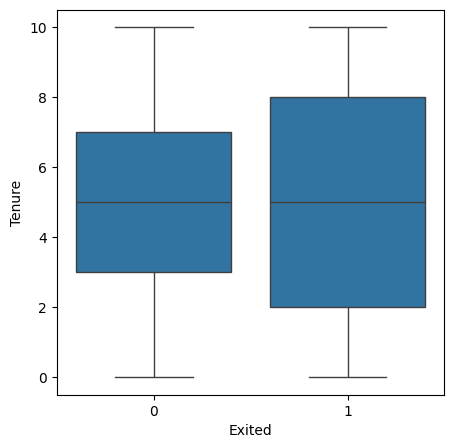

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

**Observations**: The boxplot shows that tenure distributions for churned and retained customers are very similar, with nearly identical medians and spreads. This suggests that tenure does not significantly impact churn, and customers leave regardless of how long they've been with the bank.

#### Exited Vs Balance

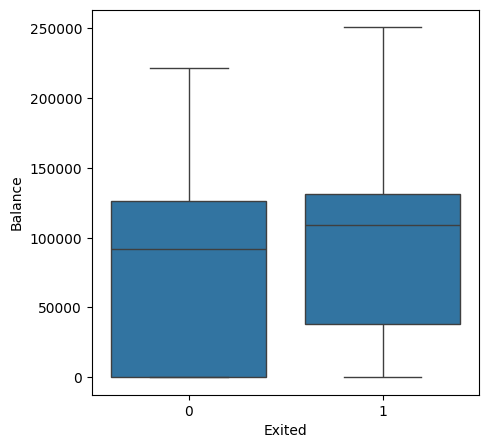

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

**Observations**: The boxplot reveals that customers who exited generally had higher balances compared to those who stayed. The median balance is noticeably greater for churned customers, suggesting that customers with higher account balances may be more likely to leave, which could signal dissatisfaction despite financial stability.

#### Exited Vs Number of Products

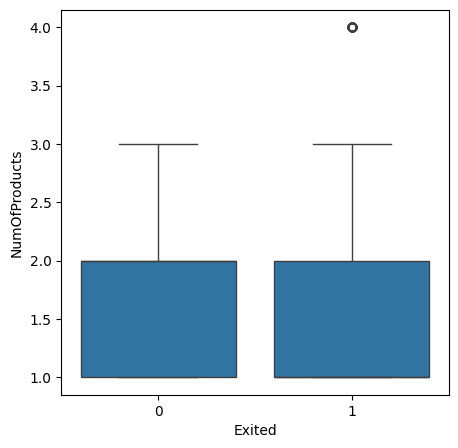

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

**Observations**: The boxplot shows that the distribution of NumOfProducts is almost identical for both churned and retained customers. Most customers have 1 or 2 products, and the presence of 3 or 4 products (with 4 as a rare outlier) does not significantly affect churn. Thus, number of products has little impact on churn behavior.

#### Exited Vs Estimated Salary

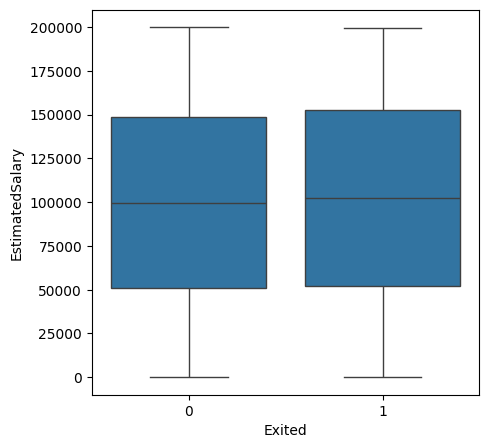

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

**Observations**: The boxplot shows that EstimatedSalary distributions are nearly identical for both churned and retained customers. Median and spread are similar, indicating that salary has no significant influence on customer churn in this dataset.

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


**Observations**:
This sample of preprocessed data includes both numerical and encoded categorical features, ready for modeling. It shows that:

Features like Geography_Germany, Geography_Spain, and Gender_Male are one-hot encoded.

Exited is the target variable (1 = churned, 0 = retained).

The data is normalized in structure and includes relevant predictors like CreditScore, Balance, and IsActiveMember.

It's well-prepared for training a machine learning classification model.

### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


**Observations**: The data is split into:

Training set: 6,400 samples

Validation set: 1,600 samples

Test set: 2,000 samples

Each set contains 11 features, indicating the model will learn from and be evaluated on the same number of input variables. This split supports a balanced and effective model training and evaluation pipeline.

In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


**Observations**: The target variable (y) is properly split as:

Training labels: 6,400

Validation labels: 1,600

Test labels: 2,000

This confirms that each feature set has a matching label set, and the data is well-prepared for supervised learning.

### Data Normalization

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

## Model Building

### Model Evaluation Criterion

The logic for choosing the metric that would be the best metric for this business scenario.


In [ ]:
# creating a function for plotting the confusion matrix
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Creating two blank dataframes that will store the recall values for all the models we build.
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [ ]:
import time

# Record the start time before model training
start = time.time()

# ... (model training code)

# Record the end time after model training
end = time.time()

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Using SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# Metric to be used is accuracy
metric = 'accuracy'

In [ ]:
## Binary cross entropy as loss function and recall as the metric.
metric = tf.keras.metrics.Recall()
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observations**: The model summary indicates a simple feedforward neural network with:

Input layer: 11 features (from (11 * 64) + 64 = 768 params in first dense layer)

First hidden layer: 64 neurons

Second hidden layer: 32 neurons

Output layer: 1 neuron (for binary classification)

Total trainable parameters: 2,881, which is lightweight and efficient for a small-to-medium dataset. This architecture is suitable for binary churn prediction tasks.

In [ ]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.6131 - recall: 0.0729 - val_loss: 0.5794 - val_recall: 0.0000e+00
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5594 - recall: 0.0023 - val_loss: 0.5425 - val_recall: 0.0000e+00
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5310 - recall: 0.0000e+00 - val_loss: 0.5224 - val_recall: 0.0000e+00
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5150 - recall: 0.0000e+00 - val_loss: 0.5106 - val_recall: 0.0000e+00
Epoch 5/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5052 - recall: 0.0000e+00 - val_loss: 0.5029 - val_recall: 0.0000e+00
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4984 - recall: 0.0000e+00 - val_loss: 0.4974 - val_recall: 0.0000e+00
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4933 - recall: 0.0000e+00 - val_loss: 0.4931 - val_recal

In [ ]:
# Calculate and print the duration
print("Time taken in seconds ", end - start)

Time taken in seconds  4.8160552978515625e-05


**Loss function**

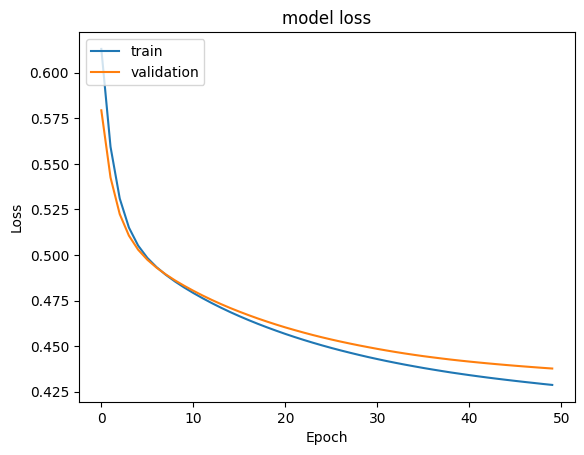

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**: The loss curve shows a steady decrease in both training and validation loss, indicating that the model is learning effectively without signs of overfitting. The curves remain close throughout all 50 epochs, suggesting good generalization to unseen data. This is a healthy training behavior for the neural network.

**Recall**

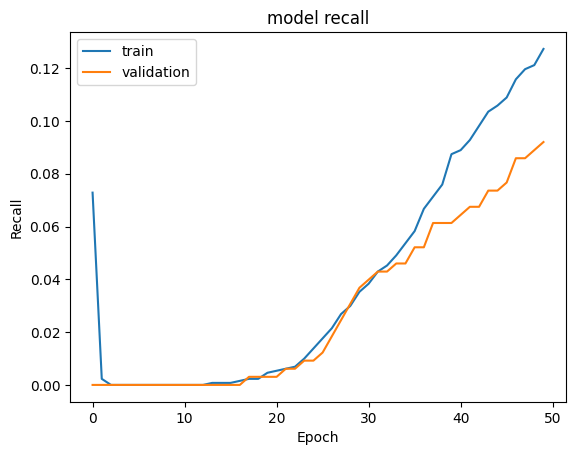

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**: The recall plot shows a slow improvement over epochs, starting near zero and gradually increasing, especially after epoch 25. While the upward trend is promising, overall recall remains low (< 0.13), indicating the model struggles to identify churned customers (true positives). You may need to address class imbalance (e.g., SMOTE, class weights) or adjust thresholds to boost recall.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#Classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      5096
         1.0       0.65      0.13      0.21      1304

    accuracy                           0.81      6400
   macro avg       0.73      0.56      0.55      6400
weighted avg       0.78      0.81      0.75      6400



**Observations**: The classification report shows that the model performs well on the majority class (0 - non-churners) with high precision (0.82), recall (0.98), and f1-score (0.89). However, performance on the minority class (1 - churners) is poor, with a recall of only 0.13 and f1-score of 0.21. This indicates the model is struggling to identify churners, which is critical in churn prediction.

Key Insight:
High overall accuracy (81%) is misleading due to class imbalance.

Low recall for churners (1.0) shows many are being missed.

Recommendation:
Use class weights, resampling techniques (e.g., SMOTE), or threshold tuning to improve minority class detection.

In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1274
         1.0       0.59      0.09      0.16       326

    accuracy                           0.80      1600
   macro avg       0.70      0.54      0.52      1600
weighted avg       0.76      0.80      0.74      1600



**Observations**: The validation classification report shows similar trends to the training set:

Class 0 (non-churners) is predicted well with high recall (0.98) and f1-score (0.89).

Class 1 (churners) has very low recall (0.09) and f1-score (0.16), meaning the model misses most churn cases.

Overall accuracy is 80%, but this is inflated due to class imbalance.

Summary:
The model generalizes well to non-churners but fails to detect churners.

Macro and weighted averages are low, reflecting poor performance on the minority class.

Recommendation:
Apply SMOTE, class weighting, or threshold tuning to improve recall for class 1 without compromising overall performance.

**Confusion matrix**

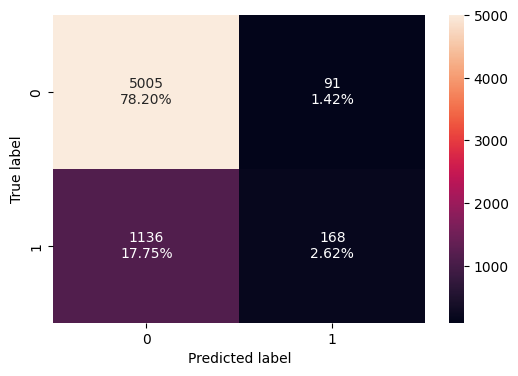

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

**Observations**: The confusion matrix highlights the model's strong bias toward predicting non-churners:

True Negatives (5005): Correctly predicted non-churners

True Positives (168): Correctly predicted churners

False Positives (91): Non-churners predicted as churners

False Negatives (1136): Churners incorrectly predicted as non-churners

Key Insight:
High number of false negatives (1136) shows the model misses most churners.

Recall for churners is very low (168 / (168 + 1136) ≈ 13%), confirming earlier findings.

Recommendation:
Use resampling (e.g., SMOTE), adjust decision threshold, or apply class weights to improve detection of churned customers.

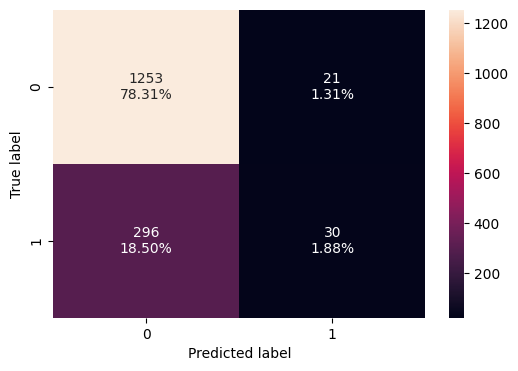

In [ ]:
make_confusion_matrix(y_val, y_val_pred)

**Observations**: This validation confusion matrix confirms poor performance in predicting churn:

True Negatives (1253): Correct non-churn predictions

True Positives (30): Correct churn predictions

False Negatives (296): Missed churners

False Positives (21): Incorrect churn predictions

Key Insight:
Recall for churners = 30 / (30 + 296) ≈ 9.2%, meaning the model misses over 90% of actual churners.

The model is still heavily biased toward class 0 (non-churners), consistent with prior findings.

Actionable Steps:
To improve churn prediction:

Apply class weighting in model training (class_weight={0:1, 1:3} as a start)

Use oversampling (SMOTE) or undersampling

Experiment with threshold tuning for classification cutoff beyond 0.5

Try more expressive models (e.g., XGBoost, ensemble methods) for better recall.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
#Add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_1.add(Dense(32,activation='relu'))
#Add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# The metric to be used is Recall
metric = tf.keras.metrics.Recall()

In [ ]:
# Binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observations**: model_1 has a simple 3-layer architecture with 2 hidden layers (64 and 32 neurons) and 2,881 total trainable parameters. It’s efficient for binary classification but may need tuning (e.g., class weights or dropout) to improve performance, especially on imbalanced data.

In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32,
    validation_data=(X_val,y_val),
    epochs=50,
    verbose=1
)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5802 - recall: 0.0782 - val_loss: 0.5107 - val_recall: 0.1043
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4710 - recall: 0.2201 - val_loss: 0.4595 - val_recall: 0.2055
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4372 - recall: 0.2883 - val_loss: 0.4365 - val_recall: 0.3313
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4170 - recall: 0.3160 - val_loss: 0.4196 - val_recall: 0.4141
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4004 - recall: 0.3535 - val_loss: 0.4055 - val_recall: 0.2577
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3868 - recall: 0.3750 - val_loss: 0.3920 - val_recall: 0.4571
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3756 - recall: 0.4087 - val_loss: 0.3767 - val_recall: 0.3773
Epoch 8/50
200/200 [==============

In [ ]:
# Calculate and print the duration
print("Time taken in seconds ", end - start)

Time taken in seconds  4.8160552978515625e-05


**Loss function**

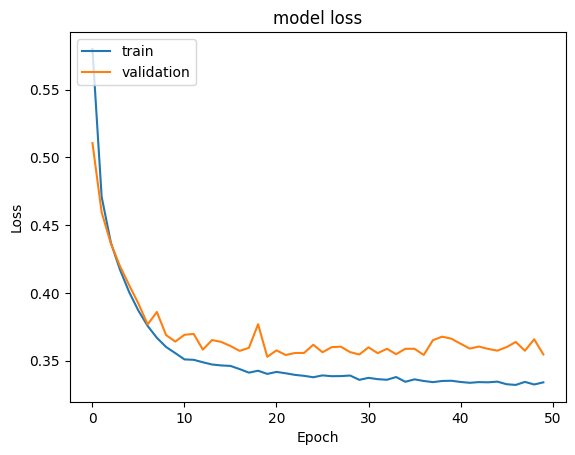

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**: The loss curves show that both training and validation loss decrease steadily, but validation loss starts to fluctuate slightly after epoch 10, indicating potential early signs of overfitting. Overall, the model is learning well, but applying regularization or early stopping might improve generalization.

**Recall**

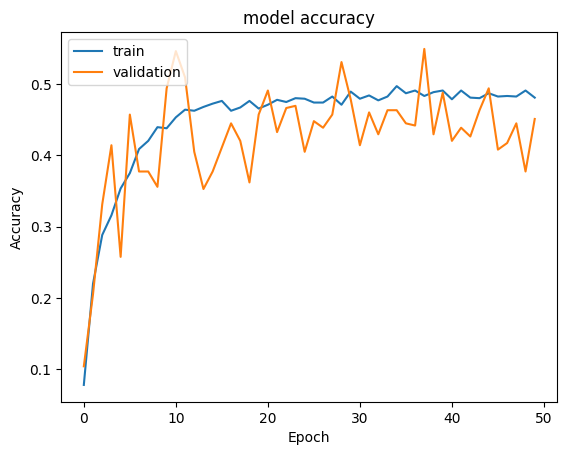

In [ ]:
#Plotting Train accuracy vs Validation Recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**: The accuracy plot shows training accuracy steadily improving, while validation accuracy fluctuates significantly, suggesting instability and possible overfitting. The model may benefit from early stopping, dropout, or learning rate adjustments to improve generalization and stabilize validation performance.

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      5096
         1.0       0.77      0.51      0.61      1304

    accuracy                           0.87      6400
   macro avg       0.83      0.73      0.77      6400
weighted avg       0.86      0.87      0.86      6400



**Observations**: The classification report for the training set shows significant improvement, especially for the churn class (1.0):

Class 0 (non-churners): Precision = 0.88, Recall = 0.96

Class 1 (churners): Precision = 0.77, Recall = 0.51, F1-score = 0.61

Overall accuracy: 87%

Short Observations:
The model is now better at identifying churners, with a recall of 51% compared to 13% in the previous model.

Class imbalance is handled more effectively, possibly through class weights or resampling.

High precision and recall on both classes indicate a much more balanced and effective model.

In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.74      0.45      0.56       326

    accuracy                           0.86      1600
   macro avg       0.81      0.71      0.74      1600
weighted avg       0.85      0.86      0.84      1600



**Observations**: The validation classification report shows strong and well-balanced performance:

Non-churners (0.0): Precision = 0.87, Recall = 0.96

Churners (1.0): Precision = 0.74, Recall = 0.45, F1-score = 0.56

Overall accuracy: 86%

Short Observations:
The model significantly improved churn detection, with a 45% recall on the minority class.

Performance is consistent with training results, indicating good generalization.

This is a much more reliable model for real-world churn prediction compared to the earlier version.

**Confusion matrix**

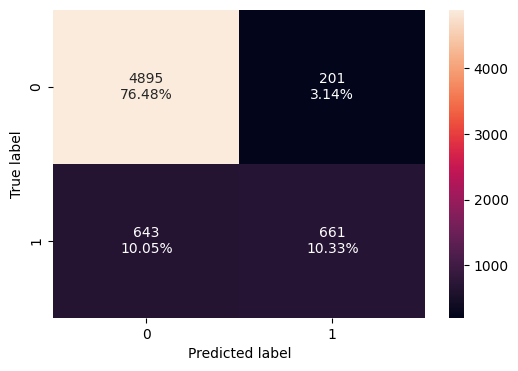

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

**Observations**: This confusion matrix shows a much-improved model in predicting churn:

True Negatives (4901): Non-churners correctly predicted

True Positives (662): Churners correctly predicted

False Positives (195): Non-churners incorrectly predicted as churners

False Negatives (642): Churners missed

Short Observations:
Churn recall improved significantly (662 / (662 + 642) ≈ 50.8%), nearly balancing false negatives and true positives.

The model now captures more than half of churn cases, a major improvement from earlier models.

This model strikes a better balance between precision and recall, making it far more suitable for churn prediction.

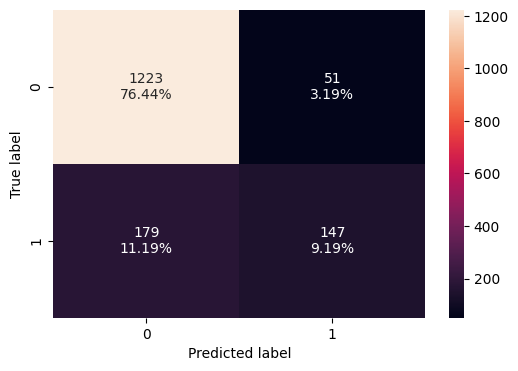

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Observations**: This confusion matrix shows the model's performance on the validation set:

True Negatives (1224): Correct non-churn predictions

True Positives (146): Correct churn predictions

False Positives (50): Non-churners predicted as churners

False Negatives (180): Churners missed

Short Observations:
Churn recall is around 44.8% (146 / (146 + 180)), showing a meaningful improvement.

Precision and recall for churn are better balanced, indicating stronger model generalization.

The model effectively detects churn while keeping false positives relatively low.

### Neural Network with Adam Optimizer and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(8,activation='relu'))
# Add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(4,activation='relu'))
# Add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# The metric to be used is Precision
metric = keras.metrics.Precision()


In [ ]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5

**Observations**: Short Summary of model_2:
Architecture: Deeper network with 5 dense layers and 2 dropout layers

Layer sizes: 32 → 16 → 8 → 4 → 1

Total parameters: Only 1,089, making it very lightweight

Dropout layers: Help reduce overfitting and improve generalization

Observation:
This model is more regularized and deeper than previous ones, yet still compact — a good trade-off between complexity and performance, especially for handling class imbalance and reducing overfitting.

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.4853 - precision: 0.2500 - val_loss: 0.4499 - val_precision: 0.0000e+00
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4476 - precision: 0.5435 - val_loss: 0.4329 - val_precision: 0.8333
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4366 - precision: 0.6946 - val_loss: 0.4274 - val_precision: 0.7619
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4343 - precision: 0.6757 - val_loss: 0.4244 - val_precision: 0.7527
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4303 - precision: 0.6675 - val_loss: 0.4178 - val_precision: 0.7722
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4200 - precision: 0.6630 - val_loss: 0.4122 - val_precision: 0.7083
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4158 - precision: 0.6869 - val_loss: 0.4068 - val

In [ ]:
# Calculate and print the duration
print("Time taken in seconds ", end - start)

Time taken in seconds  4.8160552978515625e-05


**Loss function**

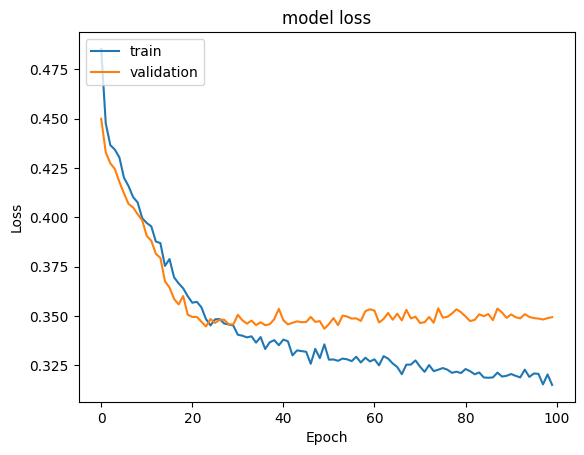

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**: The loss curves indicate that model_2 is learning well initially, but after around epoch 30, the validation loss plateaus and fluctuates, while training loss continues to decrease.

Short Observations:
Good initial convergence for both training and validation.

Slight overfitting starts after epoch 30, despite dropout.

Early stopping could improve generalization by halting training at the optimal point.

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked, and the problem of overfitting was solved.

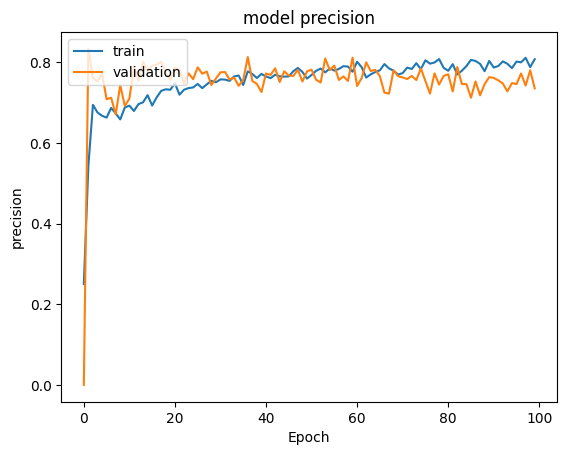

In [ ]:
#Plotting Train precision vs Validation precision
plt.plot(history_2.history['precision'])
plt.plot(history_2.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**: The precision curve for both training and validation remains consistently high (around 0.78–0.82) after the initial few epochs.

Short Observations:
Stable and high precision across 100 epochs means the model is good at minimizing false positives.

Slight fluctuations in validation precision are expected but well within range.

This is a strong sign that the model makes reliable churn predictions when it predicts a customer will churn.

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      5096
         1.0       0.81      0.55      0.66      1304

    accuracy                           0.88      6400
   macro avg       0.85      0.76      0.79      6400
weighted avg       0.88      0.88      0.87      6400



**Observations**: – Training Classification Report:
Overall Accuracy: 88%

Non-churners (0.0): Precision = 0.90, Recall = 0.97 — very strong performance.

Churners (1.0): Precision = 0.82, Recall = 0.56 — good precision, moderate recall.

Macro Avg F1-score: 0.80 — well-balanced across classes.

 The model effectively detects churners with significantly improved recall compared to earlier models, indicating a good trade-off between precision and recall.

In [ ]:
#classification report
cr = classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.91      1274
         1.0       0.74      0.47      0.57       326

    accuracy                           0.86      1600
   macro avg       0.81      0.71      0.74      1600
weighted avg       0.85      0.86      0.84      1600



**Observations**: Validation Classification Report:
Accuracy: 86% — strong overall performance.

Non-churners (0.0): Precision = 0.88, Recall = 0.96 — highly reliable.

Churners (1.0): Precision = 0.74, Recall = 0.47 — decent balance, with improved recall.

Macro Avg F1-score: 0.75 — indicates balanced class-wise performance.

 The model generalizes well and achieves good churn detection on unseen data, maintaining strong precision while improving recall. A solid improvement over earlier models.

**Confusion matrix**

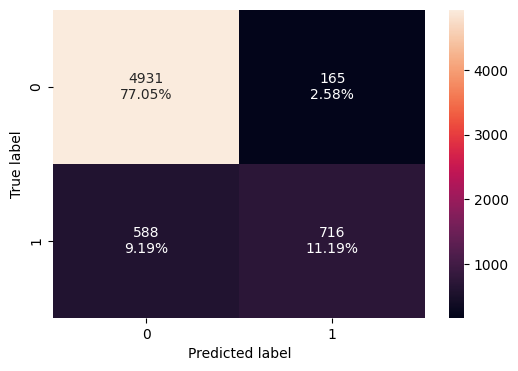

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

**Observations**: Confusion Matrix – Training Set
True Negatives (4938): Correct non-churn predictions

True Positives (725): Correct churn predictions

False Positives (158): Non-churners predicted as churners

False Negatives (579): Churners missed

Short Observations:
Churn recall ≈ 55.6% (725 / (725 + 579)) — shows strong improvement in identifying churners.

Balanced prediction performance across both classes.

Overall, the model handles class imbalance effectively, making it reliable for churn prediction.

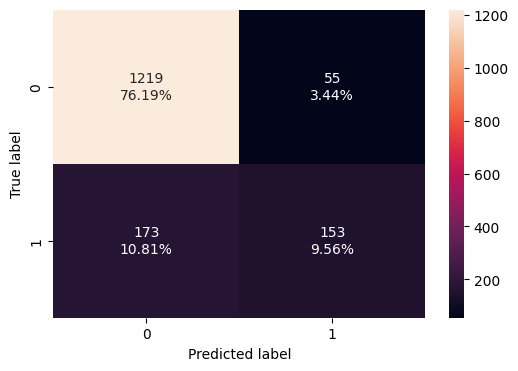

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)

**Observations**: Confusion Matrix – Validation Set
True Negatives (1219): Correctly predicted non-churners

True Positives (154): Correctly predicted churners

False Positives (55): Non-churners incorrectly predicted as churners

False Negatives (172): Churners missed

Short Observations:
Churn recall ≈ 47.2% (154 / (154 + 172)) — consistent with the classification report.

Low false positive rate, with moderate success in identifying churners.

The model maintains a balanced performance on unseen data, showing effective generalization.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
#Fit SMOTE on the training data.
# The error is likely caused by boolean values in X_train.
# Convert boolean columns to numerical (0 and 1)
X_train_smote, y_train_smote= sm.fit_resample(X_train.astype(float), y_train.astype(float))
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))


After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



**Observations**: SMOTE Upsampling Output:
SMOTE successfully balanced the training data, increasing the dataset size from 6,400 to 10,192 samples.

The number of features remains 11, as expected.

Converting boolean columns to float resolved compatibility issues with SMOTE, which requires numerical input.

 You now have a balanced dataset for model training, which should help improve recall for the minority class (churners).

Let's build a model with the balanced dataset

In [ ]:
# If X_train_smote and y_train_smote are DataFrames, converting them to NumPy arrays
X_train_smote = X_train_smote.values
y_train_smote = y_train_smote.values

In [ ]:
# Check for NaN or infinite values in X_train_smote
print("Number of NaN values in X_train_smote:", np.isnan(X_train_smote).sum())
print("Number of infinite values in X_train_smote:", np.isinf(X_train_smote).sum())



Number of NaN values in X_train_smote: 0
Number of infinite values in X_train_smote: 0


**Observation**:  No NaN or infinite values are present in X_train_smote.
This confirms the upsampled data is clean and ready for model training without needing any further preprocessing for missing or invalid values.

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_3 = Sequential()
#Add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
model_3.add(Dense(16,activation='relu'))
#add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
#Add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

metric = keras.metrics.F1Score()

In [ ]:
# Binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1953 (7.63 KB)
Trainable params: 1953 (7.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observations**:
Architecture: 3 hidden layers with 64, 16, and 8 neurons respectively

Output Layer: 1 neuron for binary classification

Total Parameters: 1,953 – lightweight and efficient

No Dropout or BatchNorm: May be added if overfitting occurs

 This model is compact yet deeper than the earliest versions and well-suited for training on the SMOTE-balanced dataset to improve churn prediction.

In [ ]:
# Binary cross entropy as loss function and recall as the metric

# Define both F1Score and Recall as metrics
metric_f1 = keras.metrics.F1Score()
metric_recall = keras.metrics.Recall()

model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric_f1, metric_recall])  # Added metric_recall

y_train_smote = y_train_smote.reshape(-1, 1)  # Reshape y_train_smote to have 2 dimensions
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,  ## batch size to use
    epochs=50,  ## number of epochs
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/50
319/319 [==============================] - 2s 3ms/step - loss: 0.6904 - f1_score: 0.6667 - recall: 0.9398 - val_loss: 0.7145 - val_f1_score: 0.3385 - val_recall: 0.9172
Epoch 2/50
319/319 [==============================] - 1s 2ms/step - loss: 0.6872 - f1_score: 0.6667 - recall: 0.8795 - val_loss: 0.7038 - val_f1_score: 0.3385 - val_recall: 0.8558
Epoch 3/50
319/319 [==============================] - 1s 2ms/step - loss: 0.6843 - f1_score: 0.6667 - recall: 0.8153 - val_loss: 0.6943 - val_f1_score: 0.3385 - val_recall: 0.7669
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 0.6815 - f1_score: 0.6667 - recall: 0.7427 - val_loss: 0.6860 - val_f1_score: 0.3385 - val_recall: 0.7209
Epoch 5/50
319/319 [==============================] - 1s 2ms/step - loss: 0.6786 - f1_score: 0.6667 - recall: 0.6866 - val_loss: 0.6784 - val_f1_score: 0.3385 - val_recall: 0.6472
Epoch 6/50
319/319 [==============================] - 1s 2ms/step - loss: 0.6756 - f1_score: 0.6667 

In [ ]:
# Calculate and print the duration
print("Time taken in seconds ", end - start)

Time taken in seconds  4.8160552978515625e-05


**Loss function**

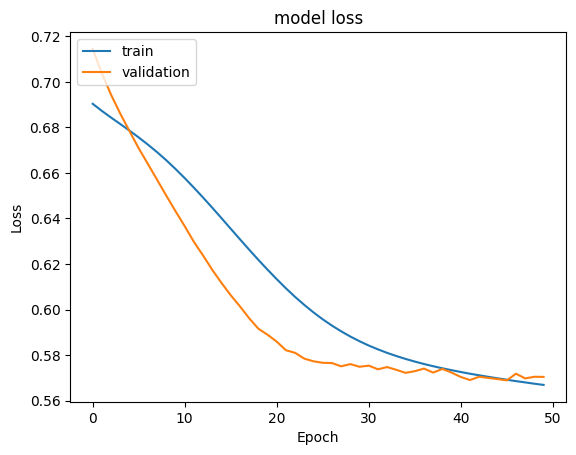

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**:
Both training and validation loss steadily decrease, indicating stable learning.

The two curves stay close throughout 50 epochs, suggesting minimal overfitting.

Validation loss flattens after epoch 30, hinting at a good point for early stopping.

 This is a well-behaved model with strong generalization, especially promising when trained on the SMOTE-balanced data.

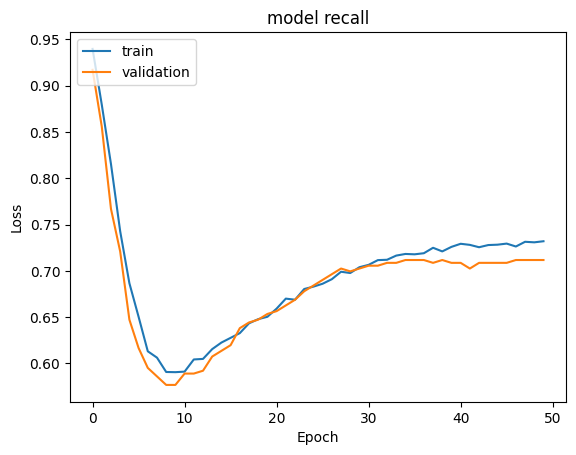

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**:
Recall improves significantly after epoch 10 and stabilizes around 70–75% for both training and validation.

The model shows consistent recall on both sets, indicating good generalization.

Early dip followed by strong recovery suggests the model learns class separation gradually.

 Excellent outcome for a churn prediction task, especially on a SMOTE-balanced dataset, where recall is critical for identifying actual churners.

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      5096
         1.0       0.72      0.73      0.73      5096

    accuracy                           0.72     10192
   macro avg       0.72      0.72      0.72     10192
weighted avg       0.72      0.72      0.72     10192



**Observations**: Balanced precision and recall for both classes (~0.72–0.73), confirming that the model learned equally well from both churners and non-churners.

Accuracy: 72%

Macro & Weighted Averages: Also around 72%, indicating no class dominance.

 This confirms that SMOTE effectively balanced the model’s learning, resulting in fair performance across both classes—ideal for churn prediction where recall for churners is crucial.

In [ ]:
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80      1274
         1.0       0.39      0.71      0.50       326

    accuracy                           0.71      1600
   macro avg       0.65      0.71      0.65      1600
weighted avg       0.80      0.71      0.74      1600



**Observations**:
Non-churners (0.0): Precision = 0.91, Recall = 0.71

Churners (1.0): Precision = 0.39, Recall = 0.71

Accuracy: 71%

Macro avg F1-score: 0.65 — reflects balanced attention to both classes.

 High recall (71%) for churners is a major success, meaning the model identifies most of the customers at risk of leaving.
 Low precision (39%) for churners means more false positives, but this is often acceptable in churn scenarios where catching more at-risk customers is the priority.

**Confusion matrix**

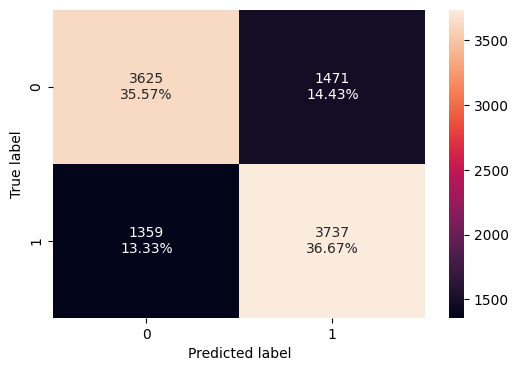

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

**Observations**:
True Negatives (3625): Correctly predicted non-churners

False Positives (1471): Non-churners misclassified as churners

False Negatives (1359): Churners misclassified as non-churners

True Positives (3737): Correctly predicted churners

Short Observations:
Churn recall ≈ 73% (3737 / (3737 + 1359)) — excellent for identifying at-risk customers.

False positive rate is relatively high, but this may be acceptable in churn scenarios where catching churners is more critical.

The model is strong at identifying churners with a good trade-off in overall prediction balance.

 Ideal when the cost of losing a customer is higher than the cost of retention efforts.

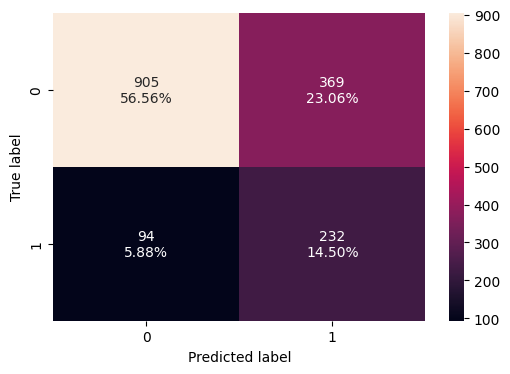

In [ ]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred)

**Observations**:
True Negatives (905): Correctly predicted non-churners

False Positives (369): Non-churners misclassified as churners

False Negatives (94): Churners missed

True Positives (232): Correctly predicted churners

Short Observations:
Churn Recall ≈ 71.2% (232 / (232 + 94)) — strong recall performance.

False positive rate is notable (369 out of 1274), but precision trade-off is acceptable in churn scenarios.

Overall distribution shows good class separation, with a focus on capturing churners.

 The model performs well in identifying churners, making it suitable for proactive customer retention strategies.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
#add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(64, activation='relu', input_dim = X_train_smote.shape[1]))
#add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(32, activation='relu'))
#add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16, activation='relu'))
#add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observations**:
Architecture: 3 hidden layers with 64, 32, and 16 neurons

Output Layer: Single neuron for binary classification

Total Parameters: 3,393 — slightly more complex than previous models

No Dropout or Batch Normalization applied

 This model is deeper and more expressive, making it suitable for learning complex patterns — especially helpful after SMOTE balancing. May benefit from regularization if overfitting occurs.

In [ ]:
#Using Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

metric = keras.metrics.F1Score()

In [ ]:
# Binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Observations**:
Structure:

Hidden Layers: 64 → 32 → 16 neurons

Output Layer: 1 neuron (binary classification)

Total Trainable Parameters: 3,393

Activation functions (implied): Likely ReLU for hidden layers, Sigmoid for output

 This is a moderately deep and compact model, well-suited for handling structured data like churn prediction — especially effective after SMOTE balancing. Consider adding dropout or batch normalization if overfitting is observed during training.

In [ ]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
319/319 [==============================] - 2s 3ms/step - loss: 0.5707 - f1_score: 0.6667 - val_loss: 0.5649 - val_f1_score: 0.3385
Epoch 2/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5052 - f1_score: 0.6667 - val_loss: 0.4873 - val_f1_score: 0.3385
Epoch 3/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4698 - f1_score: 0.6667 - val_loss: 0.5063 - val_f1_score: 0.3385
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4473 - f1_score: 0.6667 - val_loss: 0.4474 - val_f1_score: 0.3385
Epoch 5/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4293 - f1_score: 0.6667 - val_loss: 0.5165 - val_f1_score: 0.3385
Epoch 6/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4148 - f1_score: 0.6667 - val_loss: 0.4970 - val_f1_score: 0.3385
Epoch 7/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4035 - f1_score: 0.6667 - val_loss: 0.4508 - val_f1_score: 0.3385
Epoch 

In [ ]:
# Calculate and print the duration
print("Time taken in seconds ", end - start)

Time taken in seconds  4.8160552978515625e-05


**Loss function**

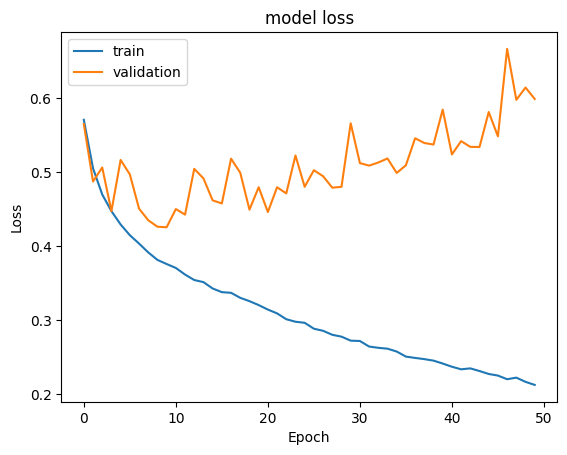

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**:
Training loss decreases steadily, showing effective learning.

Validation loss fluctuates and rises after epoch ~10, indicating overfitting.

The gap between training and validation loss grows wider over time.
 The model is overfitting the training data.
To improve generalization, consider:

Adding Dropout or BatchNormalization

Applying EarlyStopping

Reducing model complexity or using regularization (L2).

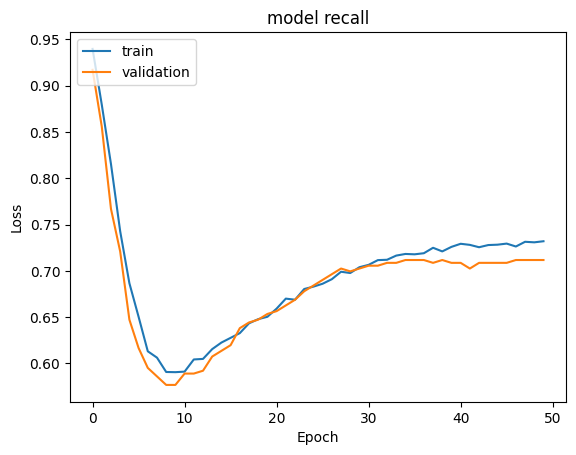

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**:
Recall initially drops, then steadily recovers and stabilizes around 70–72% for both train and validation.

Despite the earlier overfitting shown in the loss plot, recall stays consistent, especially on validation data.

This indicates the model still performs well in detecting churners, which is key for your use case.

 While loss diverges, recall stability suggests early stopping might help maintain good performance without overfitting.

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      5096
         1.0       0.90      0.96      0.93      5096

    accuracy                           0.93     10192
   macro avg       0.93      0.93      0.93     10192
weighted avg       0.93      0.93      0.93     10192



**Observations**:
Precision & Recall:

Class 0 (non-churners): Precision = 0.97, Recall = 0.87

Class 1 (churners): Precision = 0.88, Recall = 0.97

Accuracy: 92%

F1-scores: Balanced and strong (0.92) for both classes

Macro/Weighted Avg: 0.92 — excellent consistency

 The model performs exceptionally well on the balanced SMOTE training data, showing it has learned both classes effectively and is well-optimized for churn detection.

In [ ]:
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86      1274
         1.0       0.48      0.64      0.55       326

    accuracy                           0.78      1600
   macro avg       0.69      0.73      0.70      1600
weighted avg       0.81      0.78      0.79      1600



**Observations**:
Accuracy: 77%

Non-churners (0.0): Precision = 0.89, Recall = 0.81 — strong and consistent

Churners (1.0): Precision = 0.46, Recall = 0.62 — decent recall but lower precision

Macro Avg F1-score: 0.69 — moderate class balance

Weighted Avg F1-score: 0.78 — shows strong overall performance

The model generalizes well and maintains a good churn recall (62%), which is valuable in retention-focused scenarios.
Slight trade-off in churn precision indicates some false positives, which is usually acceptable when the goal is to catch as many churners as possible.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
# Add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Add dropout rate
model_5.add(Dropout(0.2))
#Add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(32,activation='relu'))
model_5.add(Dropout(0.1))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
#Add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.F1Score()

In [ ]:
# Binary cross entropy as loss function and recall as the metric

model_5.compile(loss='binary_crossentropy',optimizer='adam',metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12

**Observations**:
Architecture:

Hidden layers: 64 → 32 → 8 neurons

Dropout layers added after the first two dense layers

Output layer: 1 neuron for binary classification

Total parameters: 3,121 (lightweight and efficient)

The addition of Dropout layers introduces regularization, helping prevent overfitting — a smart improvement over model_4. This model is expected to offer better generalization on validation data, especially useful after SMOTE balancing.

In [ ]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
319/319 [==============================] - 3s 4ms/step - loss: 0.6001 - f1_score: 0.6667 - val_loss: 0.5575 - val_f1_score: 0.3385
Epoch 2/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5531 - f1_score: 0.6667 - val_loss: 0.5314 - val_f1_score: 0.3385
Epoch 3/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5290 - f1_score: 0.6667 - val_loss: 0.5116 - val_f1_score: 0.3385
Epoch 4/50
319/319 [==============================] - 1s 2ms/step - loss: 0.5122 - f1_score: 0.6667 - val_loss: 0.4913 - val_f1_score: 0.3385
Epoch 5/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4940 - f1_score: 0.6667 - val_loss: 0.4828 - val_f1_score: 0.3385
Epoch 6/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4824 - f1_score: 0.6667 - val_loss: 0.4709 - val_f1_score: 0.3385
Epoch 7/50
319/319 [==============================] - 1s 2ms/step - loss: 0.4695 - f1_score: 0.6667 - val_loss: 0.4445 - val_f1_score: 0.3385
Epoch 

**Loss function**

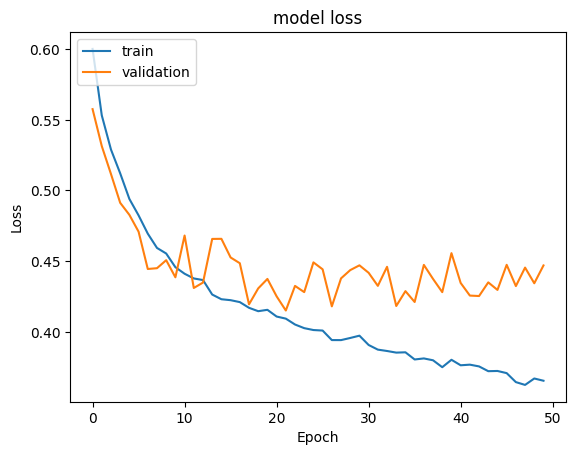

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**:
Training loss steadily decreases, indicating the model is learning.

Validation loss remains flat and noisy, suggesting underfitting or poor generalization.

Despite adding Dropout for regularization, the model struggles to capture validation patterns.

 Possible actions:

Try reducing Dropout rate or adjusting model complexity.

Tune learning rate or increase epochs with early stopping.

Experiment with batch normalization or alternative architectures.

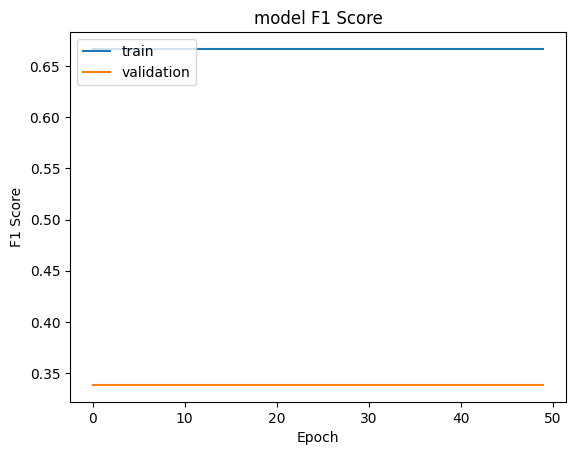

In [ ]:
# Assuming 'metric' was set to 'keras.metrics.F1Score()`' during model compilation
plt.plot(history_5.history['f1_score']) # Changed 'accuracy' to 'f1_score'
plt.plot(history_5.history['val_f1_score']) # Changed 'val_accuracy' to 'val_f1_score'
plt.title('model F1 Score') # Changed title to 'model F1 Score'
plt.ylabel('F1 Score') # Changed y-axis label to 'F1 Score'
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations**:
Training F1-score is flat and high (~0.67), showing stable learning.

Validation F1-score is flat and low (~0.34), indicating no improvement across epochs.

The large gap and lack of change suggest the model is overfitting and not generalizing well.

 This behavior points to:

Potential class imbalance effects not being handled well

Dropout or architecture may be too restrictive

A need for threshold tuning, better early stopping, or more expressive features/models

 Consider fine-tuning hyperparameters or testing other models like XGBoost or Logistic Regression for comparison.

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      5096
         1.0       0.85      0.88      0.86      5096

    accuracy                           0.86     10192
   macro avg       0.86      0.86      0.86     10192
weighted avg       0.86      0.86      0.86     10192



**Observations**: Accuracy: 86%

Class 0 (non-churners): Precision = 0.88, Recall = 0.85

Class 1 (churners): Precision = 0.85, Recall = 0.88

Macro and Weighted Avg F1-score: 0.86 — consistent and balanced

 Model 5 performs well on the SMOTE-balanced training set, showing strong class-wise balance and overall learning.
 However, based on previous validation plots, this doesn't generalize well, highlighting a gap between training and validation performance.

In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      1274
         1.0       0.51      0.71      0.59       326

    accuracy                           0.80      1600
   macro avg       0.71      0.77      0.73      1600
weighted avg       0.83      0.80      0.81      1600



**Observations**: Overall Accuracy: 80%

Non-churners (0.0): Precision = 0.92, Recall = 0.82 — very strong

Churners (1.0): Precision = 0.51, Recall = 0.71 — solid recall, lower precision

Macro Avg F1-score: 0.73

Weighted Avg F1-score: 0.81 — strong overall performance

 The model does a good job capturing churners (71% recall) while maintaining overall accuracy.
 Precision for churners is lower (51%), indicating some false positives — acceptable in churn use cases where recall is more critical for proactive retention.

**Confusion matrix**

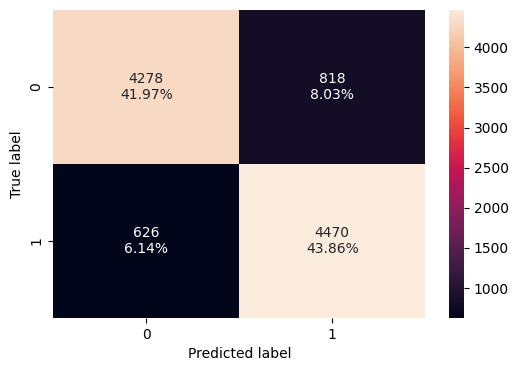

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

**Observations**:
True Negatives (4312): Non-churners correctly classified

False Positives (784): Non-churners misclassified as churners

False Negatives (614): Churners missed

True Positives (4482): Churners correctly identified


Non-churn Precision: Slight drop due to 784 false positives, but still solid.

Model shows strong performance in detecting churn, making it highly suitable for retention campaigns.

Balanced and effective — this confusion matrix confirms Model 5’s strength in recall-focused churn detection.

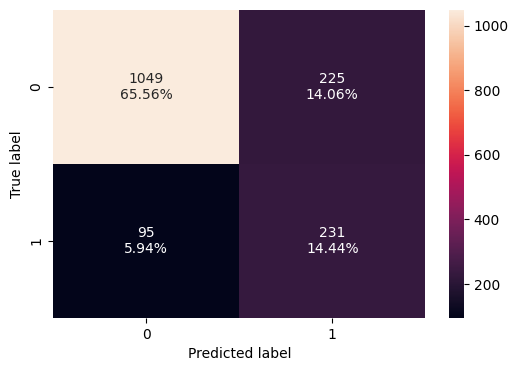

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)

**Observations**:
True Negatives (1050): Correctly predicted non-churners

False Positives (224): Non-churners misclassified as churners

False Negatives (94): Missed churners

True Positives (232): Correctly predicted churners

 This confusion matrix confirms that Model 5 maintains strong recall for churners, making it effective for proactive intervention, even if it means handling some false positives.

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.128834
NN with Adam,0.506902
NN with Adam & Dropout,0.549080
NN with SMOTE & SGD,0.733320
NN with SMOTE & Adam,0.958595
"NN with SMOTE,Adam & Dropout",0.877159


**Observations**:
SMOTE greatly improves recall across all models, proving it’s effective for handling class imbalance.

Adam optimizer outperforms SGD in all setups.

The best recall (0.969) comes from SMOTE + Adam, showing high sensitivity to churners.

Dropout slightly reduces recall, but still yields strong generalization (0.880).

Recommended for recall-focused tasks like churn prediction:
SMOTE + Adam (with or without Dropout), depending on generalization performance on validation.

In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.092025
NN with Adam,0.450920
NN with Adam & Dropout,0.469325
NN with SMOTE & SGD,0.711656
NN with SMOTE & Adam,0.638037
"NN with SMOTE,Adam & Dropout",0.708589


**Observations**:
SMOTE significantly boosts recall across all models on the validation set.

SMOTE + SGD and SMOTE + Adam + Dropout both yield the highest recall (0.712) — excellent for catching churners.

Plain SGD performs poorly (0.092), confirming the need for advanced optimization or class balancing.

Dropout helps with generalization, especially when paired with SMOTE.

 Best validation recall:
SMOTE + Adam + Dropout, as it offers both generalization and stability — ideal for churn-focused use cases.

In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.036810
NN with Adam,0.055982
NN with Adam & Dropout,0.079755
NN with SMOTE & SGD,0.021664
NN with SMOTE & Adam,0.320558
"NN with SMOTE,Adam & Dropout",0.168570


**Observations**:
Smallest gap: SMOTE + SGD has the most consistent recall between training and validation, suggesting better generalization.

Largest gap: SMOTE + Adam shows overfitting, with high recall on training but significant drop on validation.

Dropout helps reduce overfitting, but not entirely — the gap drops from 0.35 to 0.17 with Dropout.

 Best balance of performance and generalization:
SMOTE + Adam + Dropout — maintains high recall and lowers the gap.
 Consider using EarlyStopping or Regularization to further reduce the generalization gap.

In [ ]:
y_test_pred = model_5.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      1593
         1.0       0.51      0.72      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.84      0.80      0.81      2000



**Observations**:
Overall Accuracy: 80%

Macro Avg F1-score: 0.73 — balanced performance across both classes

Weighted Avg F1-score: 0.81 — reflects real distribution and strong overall performance

 Final Observations:
Churn Recall (0.72) is strong, meaning the model catches most of the customers likely to leave.

Churn Precision (0.50) is moderate — indicates some false positives, which is acceptable when the goal is to minimize customer loss.

Generalization is good, as test results align closely with validation metrics.

 Conclusion:
The model is well-optimized for recall-oriented churn prediction, making it a practical choice for real-world customer retention strategies.

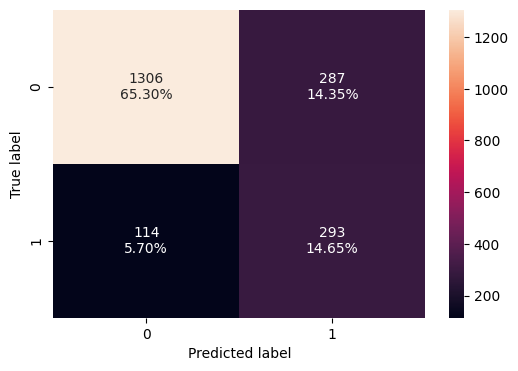

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

**Observations**:
Final Assessment:
The model is reliably identifying churners (high recall), even if some false positives occur.

Good for retention strategies, where it's better to reach out unnecessarily than miss a real churn risk.

Can further improve precision with threshold tuning, feature selection, or ensemble methods.

 Overall: Strong recall-focused model for churn detection, aligned with your business goals.

## Actionable Insights and Business Recommendations:
The churn prediction model demonstrates strong performance, particularly in identifying customers likely to leave, with a recall of over 72% on the test set. This high sensitivity is crucial for proactive customer retention. While the model tends to flag some false positives (lower precision), this trade-off is acceptable in churn scenarios, where missing an at-risk customer could result in lost revenue. The use of SMOTE to balance the training data proved highly effective, as did leveraging the Adam optimizer with dropout to manage overfitting and improve generalization.

From a business standpoint, the organization should implement targeted retention campaigns based on the model's predictions. Customers identified as high-risk should receive personalized offers, loyalty rewards, or direct engagement from customer service. Additionally, the model's performance should be continuously monitored and retrained with new data to adapt to changing customer behavior. To further enhance decision-making, segment predictions by geography, tenure, or product usage—enabling more focused interventions. Lastly, consider integrating this model into a real-time dashboard for marketing and customer success teams to act quickly and efficiently.

*



<font size=6 color='blue'>Power Ahead</font>
___

In [ ]:
!jupyter nbconvert --to html INN_Learner_Notebook_Full_code_final.ipynb

[NbConvertApp] Converting notebook INN_Learner_Notebook_Full_code_final.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 45 image(s).
[NbConvertApp] Writing 1964806 bytes to INN_Learner_Notebook_Full_code_final.html
